## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [94]:
#importing Modules We require for analyze our Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#giving Filepath 
file_path=('/content/drive/My Drive/AlmaBetter/Capstone_project/Global Terrorism Data .csv')
pd.set_option('display.max_rows',400)
df = pd.read_csv(file_path,encoding='ISO-8859-1')
print(df.columns.to_list()) #Checking dataframe columns 
print(df.shape) #Checking dataframe shape
print(df.size) #Checking dataframe  size
print(df.info()) #Checking dataframe info
pd.get_option("display.max_rows") #Formatting output

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

400

In [96]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
#looking for Null values
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [98]:
df.replace(['NaN','Null',' ','//N'],np.nan,inplace= True)

In [99]:
#Looking for all the columns with null values
a=pd.DataFrame((df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100)

In [100]:
a

,0
approxdate,94.914993
resolution,98.778145
provstate,0.231712
city,0.238867
latitude,2.507554
longitude,2.508104
specificity,0.003302
location,69.456385
summary,36.396409
doubtterr,0.000550


In [101]:
a.reset_index(inplace=True)

In [102]:
#Converting names of all the columns with null values more than 90% to a list
nulcol=a[a[0]>90].iloc[:,0]
nulcol_list = nulcol.index.to_list()
print(nulcol_list)


[0, 1, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100]


In [103]:
#length of Nullcol
len(nulcol)

62

In [104]:
# processing data -values to +values and filling nulls into 0
df['nhostkid']= np.abs(df['nhostkid']).fillna(0)
df['nhostkid'].fillna(0)


0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
181686    0.0
181687    0.0
181688    0.0
181689    0.0
181690    0.0
Name: nhostkid, Length: 181691, dtype: float64

In [105]:
#processing data -values to +values and filling nulls into 0
df['propvalue']= np.abs(df['propvalue']).fillna(0)
df['propvalue'].fillna(0)



0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
181686     0.0
181687    99.0
181688    99.0
181689     0.0
181690     0.0
Name: propvalue, Length: 181691, dtype: float64

In [106]:
#converting column names
df= df.rename(columns={'iyear':'year', 'imonth':'month','iday':'day','region_txt':'region_name','country_txt':'country_name','attacktype1_txt':'attacktype','weaptype1_txt':'weapon_name','targtype1_txt':'targtype'})
print(df.columns.to_list())

['eventid', 'year', 'month', 'day', 'approxdate', 'extended', 'resolution', 'country', 'country_name', 'region', 'region_name', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt',

In [107]:
# function for value labels with white color bg
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha =.8))

In [108]:
#No.of Global terrorist Attacks Yearwise
Year_wise_attacks=df.groupby(['year'])['year'].count().reset_index(name='attacks_year_wise')
#Year_wise_attacks=df['year'].value_counts().reset_index(name='attacks_year_wise')
print(Year_wise_attacks)



    year  attacks_year_wise
0   1970                651
1   1971                471
2   1972                568
3   1973                473
4   1974                581
5   1975                740
6   1976                923
7   1977               1319
8   1978               1526
9   1979               2662
10  1980               2662
11  1981               2586
12  1982               2544
13  1983               2870
14  1984               3495
15  1985               2915
16  1986               2860
17  1987               3183
18  1988               3721
19  1989               4324
20  1990               3887
21  1991               4683
22  1992               5071
23  1994               3456
24  1995               3081
25  1996               3058
26  1997               3197
27  1998                934
28  1999               1395
29  2000               1814
30  2001               1906
31  2002               1333
32  2003               1278
33  2004               1166
34  2005            

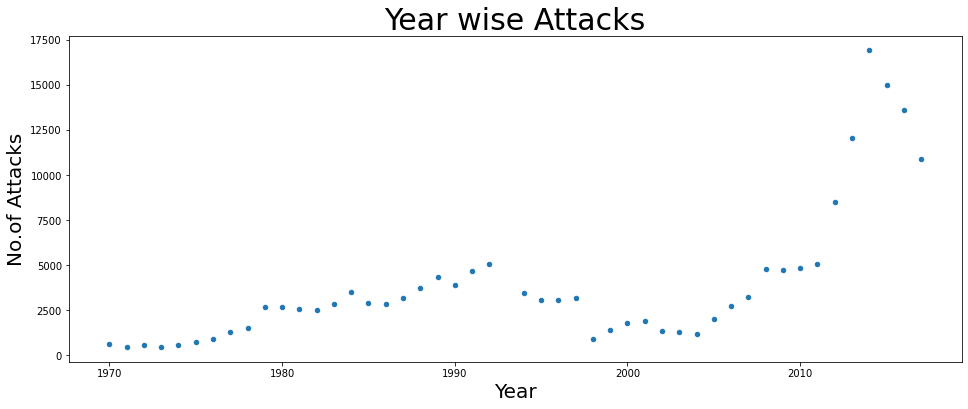

In [109]:
# Graphical Analysis of No. of  global terrorist attack Year wise
Year_wise_attacks.plot(x='year',y='attacks_year_wise',kind='scatter',figsize=(16, 6))

plt.title("Year wise Attacks",fontsize=30) #setting title
plt.xlabel("Year",fontsize=20) #setting x axis name
plt.ylabel("No.of Attacks",fontsize=20) #setting y axis name
plt.show()

In [110]:
#most global terrorist attack Year wise(descending order)
Year_wise_top_attacks = Year_wise_attacks.sort_values(by='attacks_year_wise', ascending=False) 
print(Year_wise_top_attacks)

    year  attacks_year_wise
43  2014              16903
44  2015              14965
45  2016              13587
42  2013              12036
46  2017              10900
41  2012               8522
40  2011               5076
22  1992               5071
39  2010               4826
37  2008               4805
38  2009               4721
21  1991               4683
19  1989               4324
20  1990               3887
18  1988               3721
14  1984               3495
23  1994               3456
36  2007               3242
26  1997               3197
17  1987               3183
24  1995               3081
25  1996               3058
15  1985               2915
13  1983               2870
16  1986               2860
35  2006               2758
9   1979               2662
10  1980               2662
11  1981               2586
12  1982               2544
34  2005               2017
30  2001               1906
29  2000               1814
8   1978               1526
28  1999            

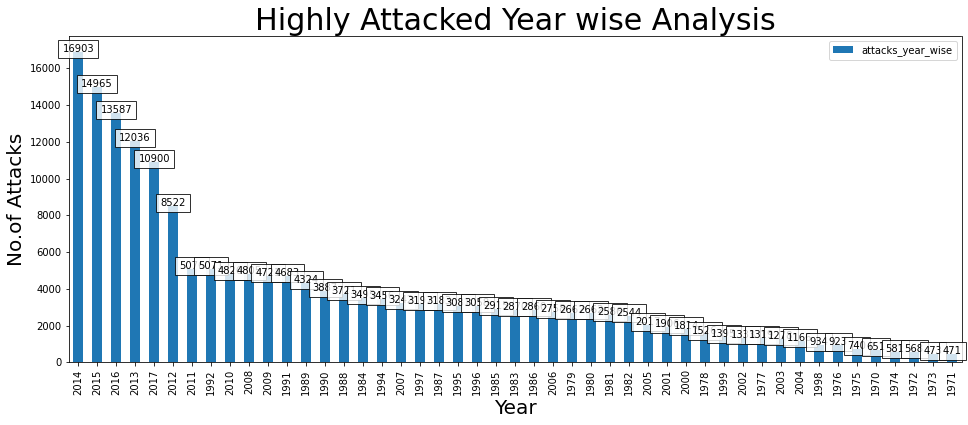

In [111]:
# Graphical Analysis of No. of  global terrorist attack Year wise
Year_wise_top_attacks.plot(x='year',y='attacks_year_wise',kind='bar',figsize=(16, 6))
ywtax=Year_wise_top_attacks['year'].to_list()
ywtay=Year_wise_top_attacks['attacks_year_wise'].astype(object).to_list()
plt.title("Highly Attacked Year wise Analysis",fontsize=30)
plt.xlabel("Year",fontsize=20)
plt.ylabel("No.of Attacks",fontsize=20)
addlabels(ywtax,ywtay)
plt.show()

In [112]:
#Top 10 Year Wise Attacks Analysis
Year_wise_top_attacks_top10=Year_wise_top_attacks[['attacks_year_wise','year']][0:10]
print(Year_wise_top_attacks_top10)

    attacks_year_wise  year
43              16903  2014
44              14965  2015
45              13587  2016
42              12036  2013
46              10900  2017
41               8522  2012
40               5076  2011
22               5071  1992
39               4826  2010
37               4805  2008


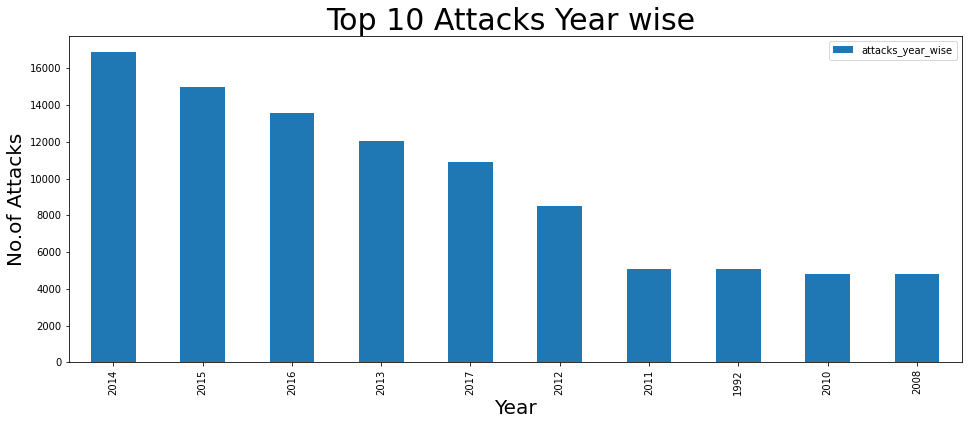

In [113]:
# Graphical Analysis of top 10  global terrorist attack Year wise
Year_wise_top_attacks_top10.plot(x='year',y='attacks_year_wise',kind='bar',figsize=(16, 6))

plt.title("Top 10 Attacks Year wise ",fontsize=30)
plt.xlabel("Year",fontsize=20)
plt.ylabel("No.of Attacks",fontsize=20)
plt.show()

In [114]:
#max Attacks done year year wise
highly_num_attacked_year_wise= Year_wise_attacks["attacks_year_wise"].max()
print(highly_num_attacked_year_wise)


16903


In [115]:
#Most Affected Countrys Year wise
country_year_wise_attack=df.groupby(['country_name','year'])['country_name'].count().reset_index(name='no_attacks_year')

print(country_year_wise_attack)

     country_name  year  no_attacks_year
0     Afghanistan  1973                1
1     Afghanistan  1979                3
2     Afghanistan  1987                1
3     Afghanistan  1988               11
4     Afghanistan  1989               10
...           ...   ...              ...
3757     Zimbabwe  2010                1
3758     Zimbabwe  2011                1
3759     Zimbabwe  2013                3
3760     Zimbabwe  2014                1
3761     Zimbabwe  2017                3

[3762 rows x 3 columns]


In [116]:
#Most Affected Countrys From Past Years
attacks_in_country_wise = country_year_wise_attack.groupby(['country_name'])['no_attacks_year'].sum().reset_index(name='no_attacks_country')
print(attacks_in_country_wise)

                         country_name  no_attacks_country
0                         Afghanistan               12731
1                             Albania                  80
2                             Algeria                2743
3                             Andorra                   1
4                              Angola                 499
5                 Antigua and Barbuda                   1
6                           Argentina                 815
7                             Armenia                  24
8                           Australia                 114
9                             Austria                 115
10                         Azerbaijan                  49
11                            Bahamas                   5
12                            Bahrain                 207
13                         Bangladesh                1648
14                           Barbados                   3
15                            Belarus                  13
16            

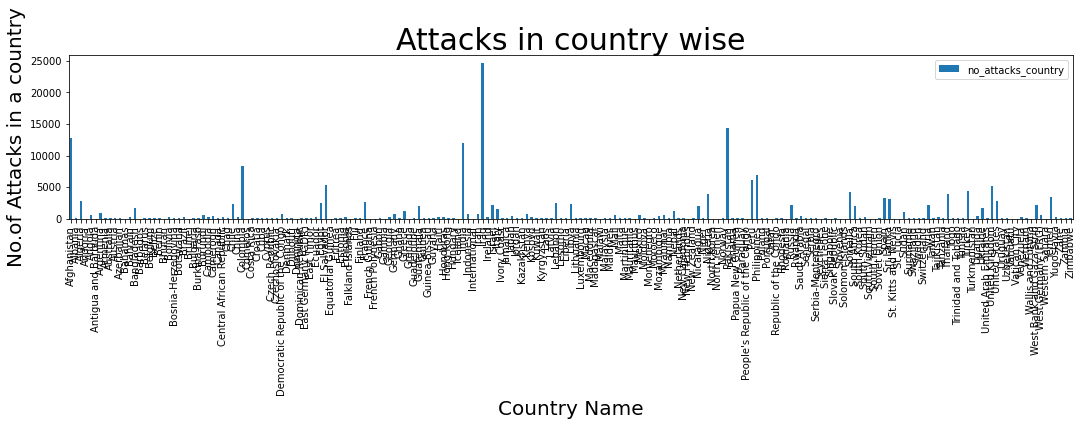

In [117]:
#Most Affected Countrys From Past Years
attacks_in_country_wise.plot(x='country_name',y='no_attacks_country',kind='bar',figsize=(18,3))
plt.title("Attacks in country wise",fontsize=30)
plt.xlabel("Country Name",fontsize=20)
plt.ylabel("No.of Attacks in a country",fontsize=20)
plt.show()

In [118]:
#Top 10 Most Affected Countrys Past Years
df2=attacks_in_country_wise.sort_values(by='no_attacks_country', ascending=False)
most_affeted_countrys=df2.iloc[:10]
print(most_affeted_countrys.head(10))

       country_name  no_attacks_country
84             Iraq               24636
134        Pakistan               14368
0       Afghanistan               12731
80            India               11960
35         Colombia                8306
140     Philippines                6908
139            Peru                6096
52      El Salvador                5320
188  United Kingdom                5235
183          Turkey                4292


In [119]:
#Top Attcked Country Countrywise
top_attacked_country=most_affeted_countrys['no_attacks_country'].max()
top_attacked=most_affeted_countrys.iloc[0:1,0]
print(top_attacked)

84    Iraq
Name: country_name, dtype: object


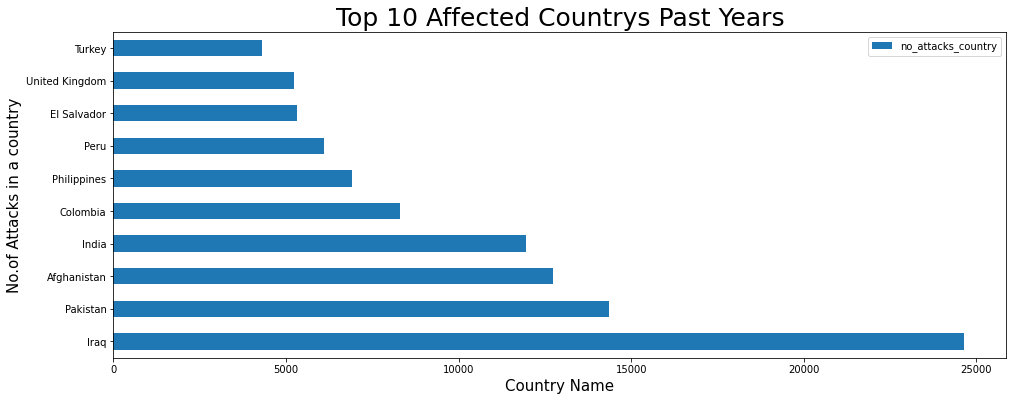

In [120]:
# Graphical Analysis of top 10 Affected Countrys Past Years
most_affeted_countrys.plot(x='country_name',y='no_attacks_country',kind='barh',figsize=(16,6))
plt.title("Top 10 Affected CounQQ")
plt.title("Top 10 Affected Countrys Past Years",fontsize=25)
plt.xlabel("Country Name",fontsize=15)
plt.ylabel("No.of Attacks in a country",fontsize=15)
plt.show()


In [121]:
#Most Affected Country among the global Attacks
max_num_country_attacks= attacks_in_country_wise[attacks_in_country_wise['no_attacks_country'] ==attacks_in_country_wise['no_attacks_country'].max()]
highly_attacked_country=(max_num_country_attacks.country_name)
print(highly_attacked_country)
max_num_country_attacks=(max_num_country_attacks.no_attacks_country)
print(max_num_country_attacks)

84    Iraq
Name: country_name, dtype: object
84    24636
Name: no_attacks_country, dtype: int64


In [122]:
# Global terrorist attack State wise
most_affected_states =df.groupby(['provstate'])['provstate'].count().reset_index(name='state_attacks_year') 
print(most_affected_states)

                                            provstate  state_attacks_year
0     (Region) of Republican Subordination (Province)                   1
1                            (Republic of) Ingushetia                   1
2                                            A Coruna                   5
3                                              Aargau                   4
4                                                Abia                  13
...                                               ...                 ...
2850                                     sakon nakhon                   1
2851                                     samut prakan                   1
2852                                         saraburi                   1
2853                                   sulawesi utara                   1
2854                                          unknown                   1

[2855 rows x 2 columns]


In [123]:
#Top10 States Most Affected in past years
top_affected_states=most_affected_states.iloc[0:10].sort_values(by = 'state_attacks_year',ascending= False)
top_affected_states.rename(columns={'state_attacks_year':'state_attacks_year_s'})
print(top_affected_states)

                                         provstate  state_attacks_year
5                                         Abkhazia                  54
9                                             Abra                  39
4                                             Abia                  13
7                   Abkhazia (Autonomous Republic)                  13
2                                         A Coruna                   5
3                                           Aargau                   4
0  (Region) of Republican Subordination (Province)                   1
1                         (Republic of) Ingushetia                   1
6                     Abkhazia (Autonomous Region)                   1
8                                Abkhazia (Region)                   1


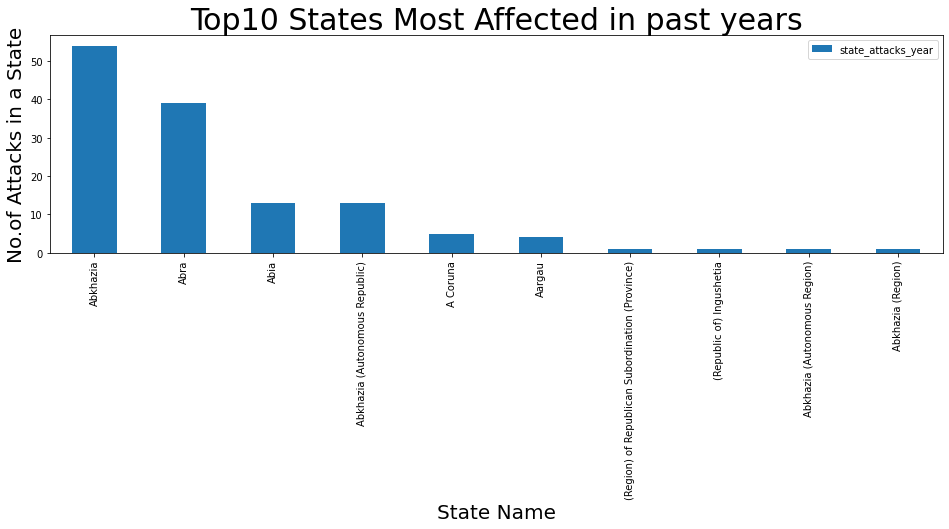

In [124]:
# Graphical Analysis of top 10  global terrorist attack State wise
top_affected_states.plot(x='provstate',y='state_attacks_year',kind='bar',figsize=(16,4))
plt.title("Top10 States Most Affected in past years",fontsize=30)
plt.xlabel("State Name",fontsize=20)
plt.ylabel("No.of Attacks in a State",fontsize=20)
plt.show()

In [125]:
# top cities of the most terror Attacks in Past Years

most_affected_city = df['city'].value_counts().reset_index(name='attacks_city_wise')
most_affected_cities=most_affected_city.rename(columns={'index':'cityname'}).sort_values(by='attacks_city_wise',ascending= False)
print(most_affected_cities)

         cityname  attacks_city_wise
0         Unknown               9775
1         Baghdad               7589
2         Karachi               2652
3            Lima               2359
4           Mosul               2265
...           ...                ...
20321     Shahkoh                  1
20320      Pleiku                  1
20319      Mabigo                  1
20318  Engelsdorf                  1
36673    Kubentog                  1

[36674 rows x 2 columns]


In [126]:
#Top 10 Most Affected Cities
highly_most_affected_cities=most_affected_cities.iloc[0:10]
print(highly_most_affected_cities)

       cityname  attacks_city_wise
0       Unknown               9775
1       Baghdad               7589
2       Karachi               2652
3          Lima               2359
4         Mosul               2265
5       Belfast               2171
6      Santiago               1621
7     Mogadishu               1581
8  San Salvador               1558
9      Istanbul               1048


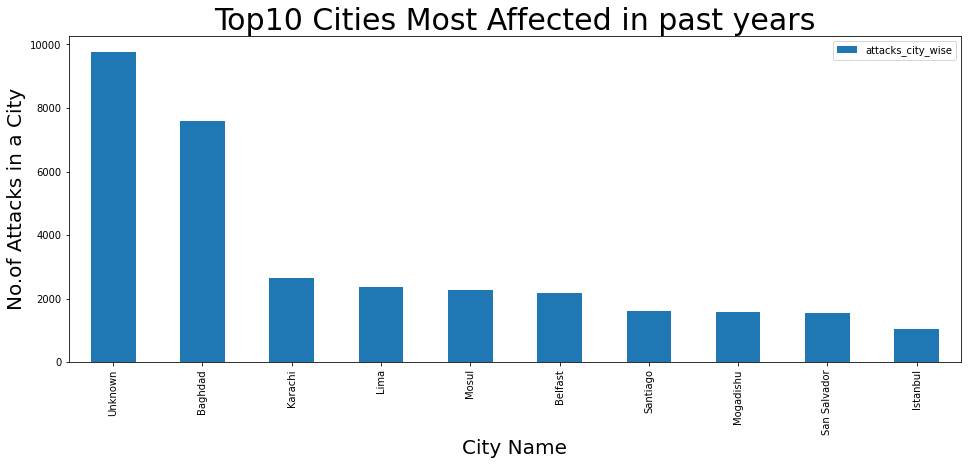

In [127]:
# Graphical Analysis of top 10  global terrorist attack city wise
highly_most_affected_cities.plot(x='cityname',y='attacks_city_wise',kind='bar',figsize=(16,6))
plt.title("Top10 Cities Most Affected in past years",fontsize=30)
plt.xlabel("City Name",fontsize=20)
plt.ylabel("No.of Attacks in a City",fontsize=20)
plt.show()

In [128]:
#no.of Persons killed in the attacks Year Wise
no_killed_attacks=df.groupby('year', as_index=False).agg({"nkill": "sum"})
print(no_killed_attacks)

    year    nkill
0   1970    174.0
1   1971    173.0
2   1972    566.0
3   1973    370.0
4   1974    539.0
5   1975    617.0
6   1976    674.0
7   1977    456.0
8   1978   1459.0
9   1979   2100.0
10  1980   4400.0
11  1981   4851.0
12  1982   5136.0
13  1983   9444.0
14  1984  10450.0
15  1985   7094.0
16  1986   4976.0
17  1987   6482.0
18  1988   7208.0
19  1989   8152.0
20  1990   7148.0
21  1991   8429.0
22  1992   9742.0
23  1994   7690.0
24  1995   6103.0
25  1996   6966.0
26  1997  10924.0
27  1998   4688.0
28  1999   3393.0
29  2000   4403.0
30  2001   7729.0
31  2002   4805.0
32  2003   3317.0
33  2004   5743.0
34  2005   6331.0
35  2006   9380.0
36  2007  12824.0
37  2008   9157.0
38  2009   9273.0
39  2010   7827.0
40  2011   8246.0
41  2012  15497.0
42  2013  22273.0
43  2014  44490.0
44  2015  38853.0
45  2016  34871.0
46  2017  26445.0


In [129]:
total_no_killed_in_attacks=no_killed_attacks['nkill'].sum()
print(total_no_killed_in_attacks)


411868.0


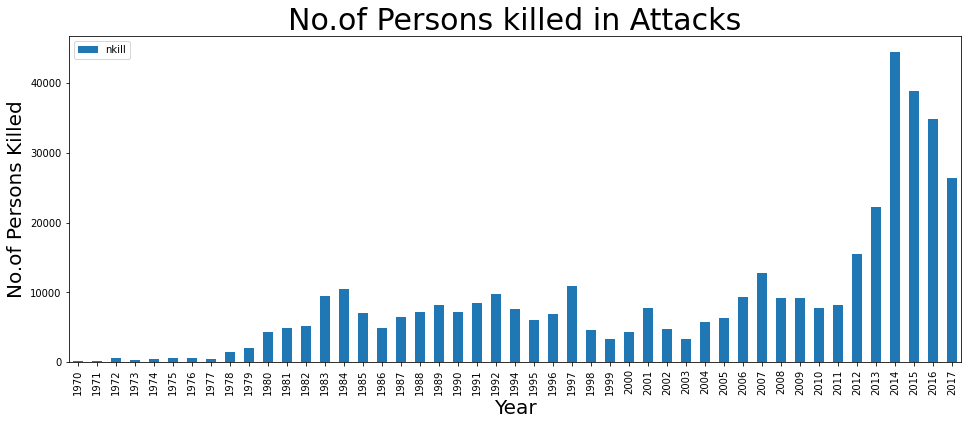

In [130]:
#Graphical Analysis of no.of Persons killed in the attacks Year Wise
no_killed_attacks.plot(x='year',y='nkill',kind='bar',figsize=(16,6))
plt.title("No.of Persons killed in Attacks",fontsize=30)
plt.xlabel("Year",fontsize=20)
plt.ylabel("No.of Persons Killed",fontsize=20)
plt.show()

In [131]:
#no.of Persons injured in the attacks Year Wise
no_wounded_attack=df.groupby('year', as_index=False).agg({"nwound": "sum"})
no_wounded_attacks=no_wounded_attack.rename(columns={'nwound':'wounded_in_attacks'})
print(no_wounded_attacks)


    year  wounded_in_attacks
0   1970               212.0
1   1971                82.0
2   1972               409.0
3   1973               495.0
4   1974               865.0
5   1975               617.0
6   1976               756.0
7   1977               518.0
8   1978              1600.0
9   1979              2506.0
10  1980              3645.0
11  1981              3337.0
12  1982              3342.0
13  1983              4047.0
14  1984              5291.0
15  1985              5130.0
16  1986              5814.0
17  1987              5775.0
18  1988              6960.0
19  1989              5539.0
20  1990              6128.0
21  1991              7591.0
22  1992              9915.0
23  1994              7569.0
24  1995             14292.0
25  1996             10795.0
26  1997              9072.0
27  1998              8183.0
28  1999              5341.0
29  2000              5869.0
30  2001             22774.0
31  2002              7162.0
32  2003              7384.0
33  2004      

In [132]:
#Total no.of Persons injured in the attacks Year Wise
total_no_injured_in_attacks=no_wounded_attacks['wounded_in_attacks'].sum()
print(total_no_injured_in_attacks)

523869.0


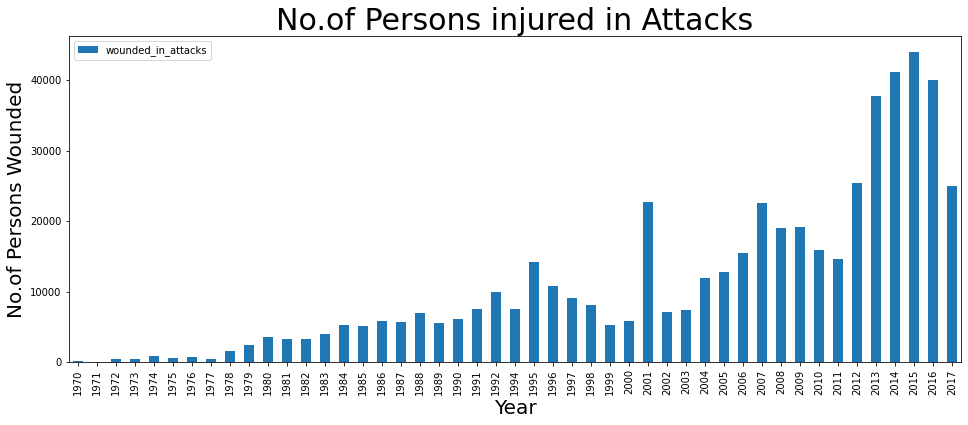

In [133]:
#Graphical Analysis of no.of Persons Wounded in the attacks Year Wise
no_wounded_attacks.plot(x='year',y='wounded_in_attacks',kind='bar',figsize=(16,6))
plt.title("No.of Persons injured in Attacks",fontsize=30)
plt.xlabel("Year",fontsize=20)
plt.ylabel("No.of Persons Wounded",fontsize=20)
plt.show()

In [134]:
#Attack Types

attack_type= df.groupby(['attacktype'])['attacktype'].count().reset_index(name='num_attacks')

print(attack_type)

                            attacktype  num_attacks
0                        Armed Assault        42669
1                        Assassination        19312
2                    Bombing/Explosion        88255
3       Facility/Infrastructure Attack        10356
4                            Hijacking          659
5  Hostage Taking (Barricade Incident)          991
6          Hostage Taking (Kidnapping)        11158
7                      Unarmed Assault         1015
8                              Unknown         7276


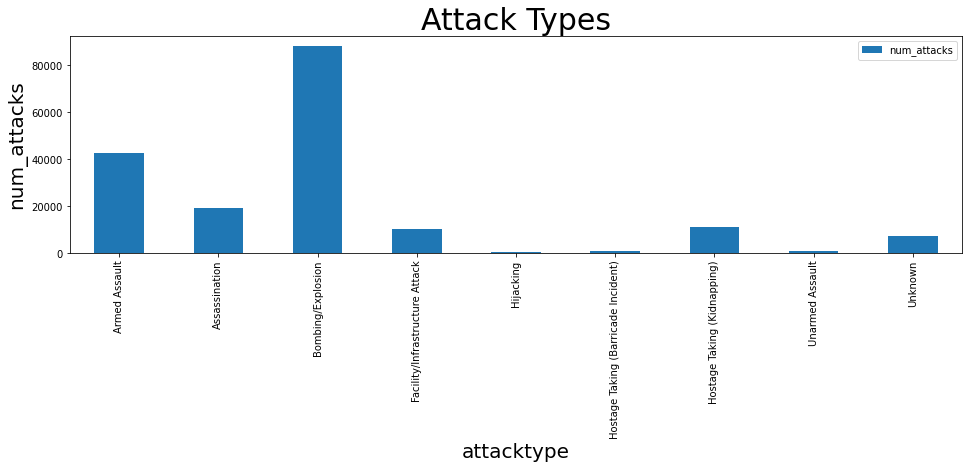

In [135]:
#Graphical Analysis of Attack Types Past Years
attack_type.plot(x='attacktype',y='num_attacks',kind='bar',figsize=(16,4))
plt.title("Attack Types",fontsize=30)
plt.xlabel("attacktype",fontsize=20)
plt.ylabel("num_attacks",fontsize=20)
plt.show()

In [136]:
#Most Used Weapons
most_used_weapons= df.groupby(['weapon_name'])['weapon_name'].count().reset_index(name='no_times_used_weapons')
# attack_type= df.groupby(['attacktype'])['attacktype'].count().reset_index(name='num_attacks')
print(most_used_weapons)

                                          weapon_name  no_times_used_weapons
0                                          Biological                     35
1                                            Chemical                    321
2                                          Explosives                  92426
3                                        Fake Weapons                     33
4                                            Firearms                  58524
5                                          Incendiary                  11135
6                                               Melee                   3655
7                                               Other                    114
8                                        Radiological                     14
9                                  Sabotage Equipment                    141
10                                            Unknown                  15157
11  Vehicle (not to include vehicle-borne explosiv...                    136

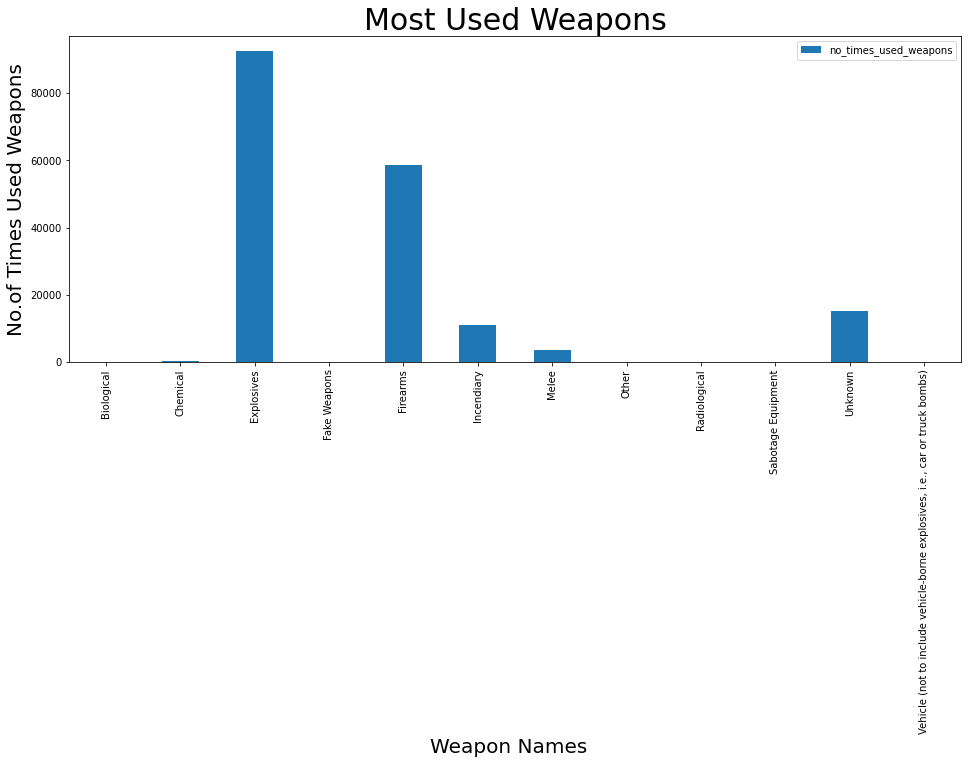

In [137]:
#Graphical Analysis of Most Used Weapons in the attacks 
most_used_weapons.plot(x='weapon_name',y='no_times_used_weapons',kind='bar',figsize=(16,6))
plt.title("Most Used Weapons",fontsize=30)
plt.xlabel("Weapon Names  ",fontsize=20)
plt.ylabel("No.of Times Used Weapons",fontsize=20)
plt.show()

In [138]:
#Terrorist Groups names and Attacks
terrorist_groups=df.groupby(['gname'])['gname'].count().reset_index(name='no_times_attacked')
no_terrorist_groups=terrorist_groups.sort_values(by='no_times_attacked', ascending= False)
print(no_terrorist_groups)


                                                 gname  no_times_attacked
3408                                           Unknown              82782
3138                                           Taliban               7478
1535       Islamic State of Iraq and the Levant (ISIL)               5613
2948                                 Shining Path (SL)               4555
1120  Farabundo Marti National Liberation Front (FMLN)               3351
...                                                ...                ...
1570   Jaish al-Muhajireen wal-Ansar (Muhajireen Army)                  1
1569                            Jaish al-Islam (Libya)                  1
1565                               Jaish Tahkim al-Din                  1
1564                Jaish Al-Umma (Army of the Nation)                  1
3536             leftist guerrillas-Bolivarian militia                  1

[3537 rows x 2 columns]


In [139]:
#Top 10 Terrorist Group Names
top_terrorist_group_names=no_terrorist_groups[0:10]
print(top_terrorist_group_names)

                                                 gname  no_times_attacked
3408                                           Unknown              82782
3138                                           Taliban               7478
1535       Islamic State of Iraq and the Levant (ISIL)               5613
2948                                 Shining Path (SL)               4555
1120  Farabundo Marti National Liberation Front (FMLN)               3351
177                                         Al-Shabaab               3288
2266                           New People's Army (NPA)               2772
1484                       Irish Republican Army (IRA)               2671
2717     Revolutionary Armed Forces of Colombia (FARC)               2487
704                                         Boko Haram               2418


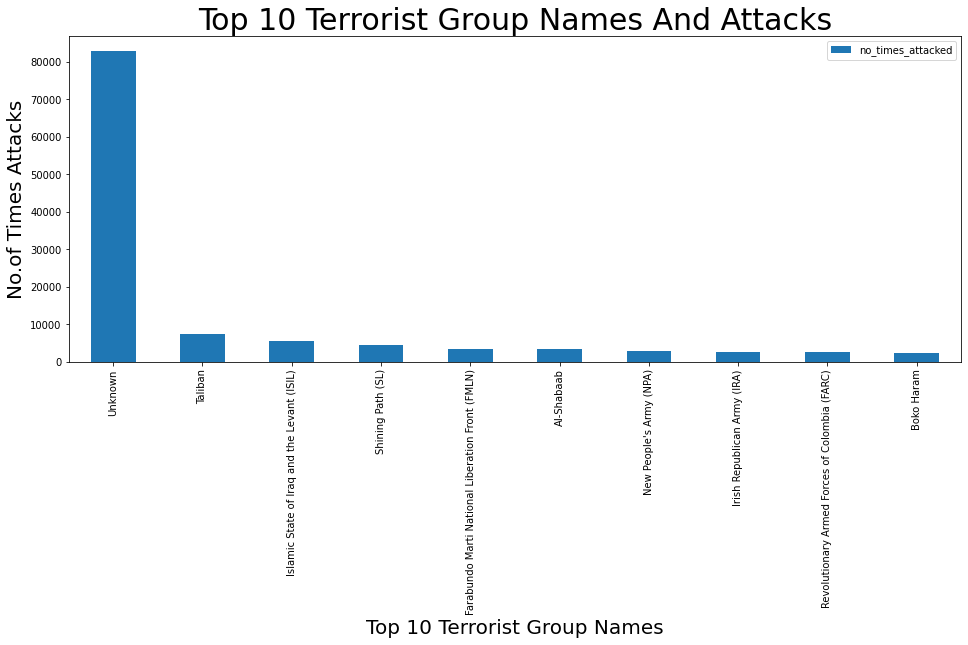

In [140]:
#Graphical Analysis of Group Names and Attacks 
top_terrorist_group_names.plot(x='gname',y='no_times_attacked',kind='bar',figsize=(16,6))
plt.title("Top 10 Terrorist Group Names And Attacks",fontsize=30)
plt.xlabel("Top 10 Terrorist Group Names",fontsize=20)
plt.ylabel("No.of Times Attacks",fontsize=20)
plt.show()

Text(0, 0.5, 'No.of Terror attacks')

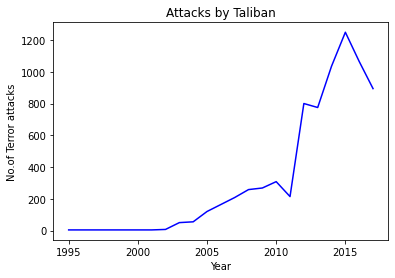

In [142]:
#the graphical analysis of taliban attacks yearwise
df[df.gname=='Taliban'].year.value_counts().head(30).sort_index().plot.line(color='blue')
plt.title('Attacks by Taliban')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [143]:
#What Terrorist Motivates
terrorist_motivates=df.groupby(['motive'])['year'].count().reset_index(name='no_times_motive')
no_terrorist_motivates=terrorist_motivates.sort_values(by='no_times_motive' ,ascending=False)
print(no_terrorist_motivates)
print(no_terrorist_motivates['no_times_motive'].sum())

                                                  motive  no_times_motive
14279                                            Unknown            14889
6290      The specific motive for the attack is unknown.            14430
9128   The specific motive is unknown; however, sourc...              297
6292     The specific motive for the attack is unknown..              148
6277   The specific motive for the attack is unknown ...              144
...                                                  ...              ...
5130   The attack was carried out because the victims...                1
5131   The attack was carried out because the victims...                1
5132   The attack was carried out because the victims...                1
5133   The attack was carried out because the victims...                1
7245   The specific motive is unknown; however, Tehri...                1

[14490 rows x 2 columns]
50561


In [144]:
#TerrorTarget Types
TerrorTarget=df['targtype'].value_counts().reset_index(name="target_count")
TerrorTargets=TerrorTarget.rename(columns={'index':'targets_of_terror_attacks'})
print(TerrorTargets)

         targets_of_terror_attacks  target_count
0      Private Citizens & Property         43511
1                         Military         27984
2                           Police         24506
3             Government (General)         21283
4                         Business         20669
5                   Transportation          6799
6                        Utilities          6023
7                          Unknown          5898
8   Religious Figures/Institutions          4440
9          Educational Institution          4322
10         Government (Diplomatic)          3573
11    Terrorists/Non-State Militia          3039
12             Journalists & Media          2948
13         Violent Political Party          1866
14             Airports & Aircraft          1343
15               Telecommunication          1009
16                             NGO           970
17                        Tourists           440
18                        Maritime           351
19            Food o

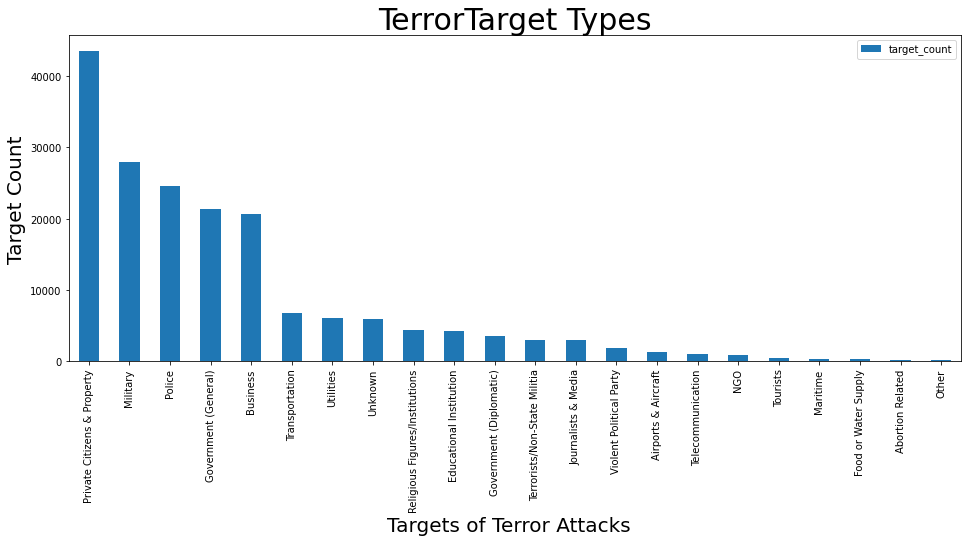

In [145]:
#Graphical Analysis of Terror Target Types 
TerrorTargets.plot(x='targets_of_terror_attacks',y='target_count',kind='bar',figsize=(16,6))

plt.title("TerrorTarget Types",fontsize=30)
plt.xlabel("Targets of Terror Attacks  ",fontsize=20)
plt.ylabel("Target Count",fontsize=20)

plt.show()

In [146]:
# Region Wise Attacks

region_wise_attacks= df.groupby(['region_name'])['year'].count().reset_index(name='regionattacks')

print(region_wise_attacks)

                    region_name  regionattacks
0         Australasia & Oceania            282
1   Central America & Caribbean          10344
2                  Central Asia            563
3                     East Asia            802
4                Eastern Europe           5144
5    Middle East & North Africa          50474
6                 North America           3456
7                 South America          18978
8                    South Asia          44974
9                Southeast Asia          12485
10           Sub-Saharan Africa          17550
11               Western Europe          16639


In [147]:
#regionWise Attacks Converting List For using Pie chart
rwax=region_wise_attacks['region_name'].to_list()
rway=region_wise_attacks['regionattacks'].astype(object).to_list()

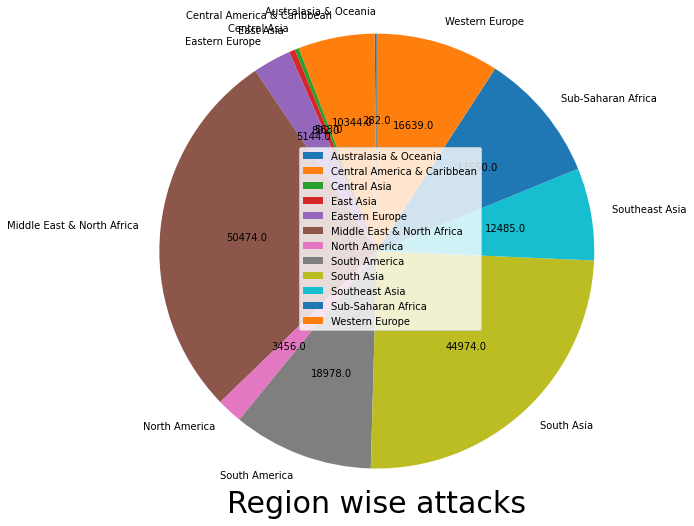

In [148]:
# region_wise_attacks.plot(x='region_wise_attacks',y='regionattacks',kind='pie',figsize=(10,10))
plt.xlabel("Region wise attacks",fontsize=30,labelpad=130)
regionattacks = np.array(region_wise_attacks['regionattacks'].to_list())
def absolute_value(val):
    a  = np.round(val/100.*regionattacks.sum(), 0)
    return a
plt.pie(regionattacks, labels = rwax, startangle = 90,radius=2.5,autopct=absolute_value)
plt.legend()
plt.show() 

In [149]:
#Terror Attacks Hosted By Kid
kids_hosted_attacks= df.groupby(['year'])['nhostkid'].sum().reset_index(name='kids_hosted')
print(kids_hosted_attacks)
total_no_kids_hosted_attacks=kids_hosted_attacks['kids_hosted'].sum()
print("Total no. of kids Hosted in  Attacks "+str(total_no_kids_hosted_attacks))


    year  kids_hosted
0   1970       1251.0
1   1971        456.0
2   1972       1490.0
3   1973       1056.0
4   1974        475.0
5   1975       1415.0
6   1976       1261.0
7   1977       2112.0
8   1978       2991.0
9   1979      14846.0
10  1980       7827.0
11  1981      10572.0
12  1982      11479.0
13  1983      41027.0
14  1984       7786.0
15  1985       5213.0
16  1986       9812.0
17  1987       3679.0
18  1988       1522.0
19  1989       2005.0
20  1990       1912.0
21  1991       2464.0
22  1992       3668.0
23  1994       6206.0
24  1995       4934.0
25  1996       6435.0
26  1997       2717.0
27  1998       1093.0
28  1999       2695.0
29  2000       4604.0
30  2001       3307.0
31  2002       2581.0
32  2003       1745.0
33  2004       1946.0
34  2005       4531.0
35  2006       3031.0
36  2007       2429.0
37  2008       3613.0
38  2009       8099.0
39  2010       4531.0
40  2011       3065.0
41  2012       2696.0
42  2013       5745.0
43  2014      28312.0
44  2015  

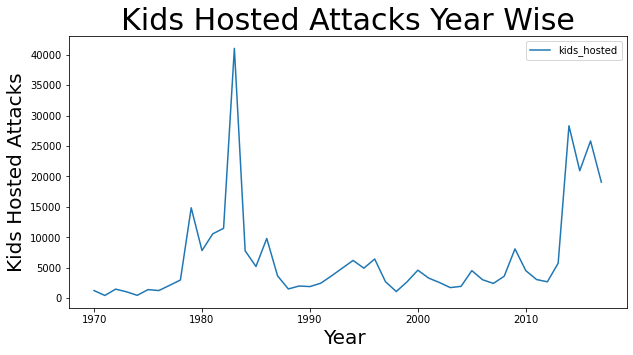

In [151]:
#Graphical Analysis of Terrors Hosted By Kids

kids_hosted_attacks.plot(x='year',y='kids_hosted',kind='line',figsize=(10,5))
plt.title("Kids Hosted Attacks Year Wise",fontsize=30)
plt.xlabel("Year ",fontsize=20)
plt.ylabel("Kids Hosted Attacks",fontsize=20)
plt.show()

In [150]:
# Analysis of Attacks Success and Failed Attacks

success_attacks=df[df['success']==1]['success']
print(success_attacks)
failure_attacks=df[df['success']==0]['success']
print(failure_attacks)
no_of_attacks=df['year'].count()
print(no_of_attacks)
no_of_success_attacks=success_attacks.count()
print(no_of_success_attacks)
no_of_failure_attacks=failure_attacks.count()
print(no_of_failure_attacks)



0         1
1         1
2         1
3         1
4         1
         ..
181684    1
181685    1
181686    1
181687    1
181688    1
Name: success, Length: 161632, dtype: int64
6         0
10        0
23        0
39        0
43        0
         ..
181650    0
181674    0
181679    0
181689    0
181690    0
Name: success, Length: 20059, dtype: int64
181691
161632
20059


In [155]:
#Success Rate of Accuracy
success_rate_of_accuracy=no_of_success_attacks/no_of_attacks*100
print(success_rate_of_accuracy)

88.95982739926579


In [154]:
#During Attacks property loss 
property_loss_in_attacks= df.groupby(['year'])['propvalue'].sum().reset_index(name='propertyloss')

print(property_loss_in_attacks)

    year  propertyloss
0   1970  3.207289e+07
1   1971  3.769300e+06
2   1972  1.242395e+07
3   1973  1.349835e+07
4   1974  1.835658e+07
5   1975  5.829146e+06
6   1976  2.144813e+07
7   1977  1.463382e+08
8   1978  5.553437e+07
9   1979  6.775883e+07
10  1980  1.581281e+08
11  1981  1.007000e+08
12  1982  7.482047e+08
13  1983  8.692035e+07
14  1984  7.210406e+07
15  1985  5.657164e+07
16  1986  4.259536e+07
17  1987  9.389933e+07
18  1988  9.219400e+07
19  1989  1.646858e+08
20  1990  4.355198e+07
21  1991  1.874643e+08
22  1992  2.791958e+09
23  1994  5.918616e+07
24  1995  6.553834e+08
25  1996  1.296775e+09
26  1997  2.890494e+07
27  1998  3.092592e+07
28  1999  1.890284e+07
29  2000  8.437235e+06
30  2001  3.666541e+08
31  2002  1.331202e+08
32  2003  2.804282e+07
33  2004  4.200500e+07
34  2005  2.104996e+06
35  2006  1.186520e+07
36  2007  3.694107e+07
37  2008  7.919823e+06
38  2009  3.165877e+06
39  2010  2.597730e+06
40  2011  5.133270e+06
41  2012  1.068130e+07
42  2013  2

In [156]:
#Property loss During Attacks
total_property_loss_in_attacks=property_loss_in_attacks['propertyloss'].sum()
print("Total Property Loss During Attacks "+str(total_property_loss_in_attacks) +" milliondollars")



Total Property Loss During Attacks 8147031323.809878 milliondollars


In [157]:
#conclusion values of Our Analysis
print("Number Of Attacks = "+str(no_of_attacks))
print("Number Of Success Attacks = "+str(no_of_success_attacks))
print("Number Of Failure Attacks = "+str(no_of_failure_attacks))
print("Success Rate Of Accuracy = "+str(success_rate_of_accuracy))
print("Total no. of kids Hosted in  Attacks = "+str(total_no_kids_hosted_attacks))
print("Total num killed in  Attacks = "+str(total_no_killed_in_attacks))
print("Total num  injured  in  Attacks = "+str(total_no_injured_in_attacks))
print("Total Property Losses in  Attacks = "+str(total_property_loss_in_attacks) +" milliondollars")
print("Top Attacks Year wise = "+str(highly_num_attacked_year_wise))


Number Of Attacks = 181691
Number Of Success Attacks = 161632
Number Of Failure Attacks = 20059
Success Rate Of Accuracy = 88.95982739926579
Total no. of kids Hosted in  Attacks = 306451.0
Total num killed in  Attacks = 411868.0
Total num  injured  in  Attacks = 523869.0
Total Property Losses in  Attacks = 8147031323.809878 milliondollars
Top Attacks Year wise = 16903
